In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from src.dm import DataModule

trans = {
    'Resize': {
        'width': 224,
        'height': 224
    },
    #'HorizontalFlip': {},
    #'VerticalFlip': {},
    #'Transpose': {},
    #'Rotate': {}
}

val_trans = {
    'Resize': {
        'width': 224,
        'height': 224
    }
}

dm = DataModule(train_trans=trans, val_trans=val_trans, batch_size=3, shuffle_train=False, val_with_train=True)
dm.setup()

In [28]:
imgs, masks = next(iter(dm.train_dataloader()))
imgs.shape, masks.shape

(torch.Size([3, 2, 224, 224]), torch.Size([3, 8, 224, 224]))

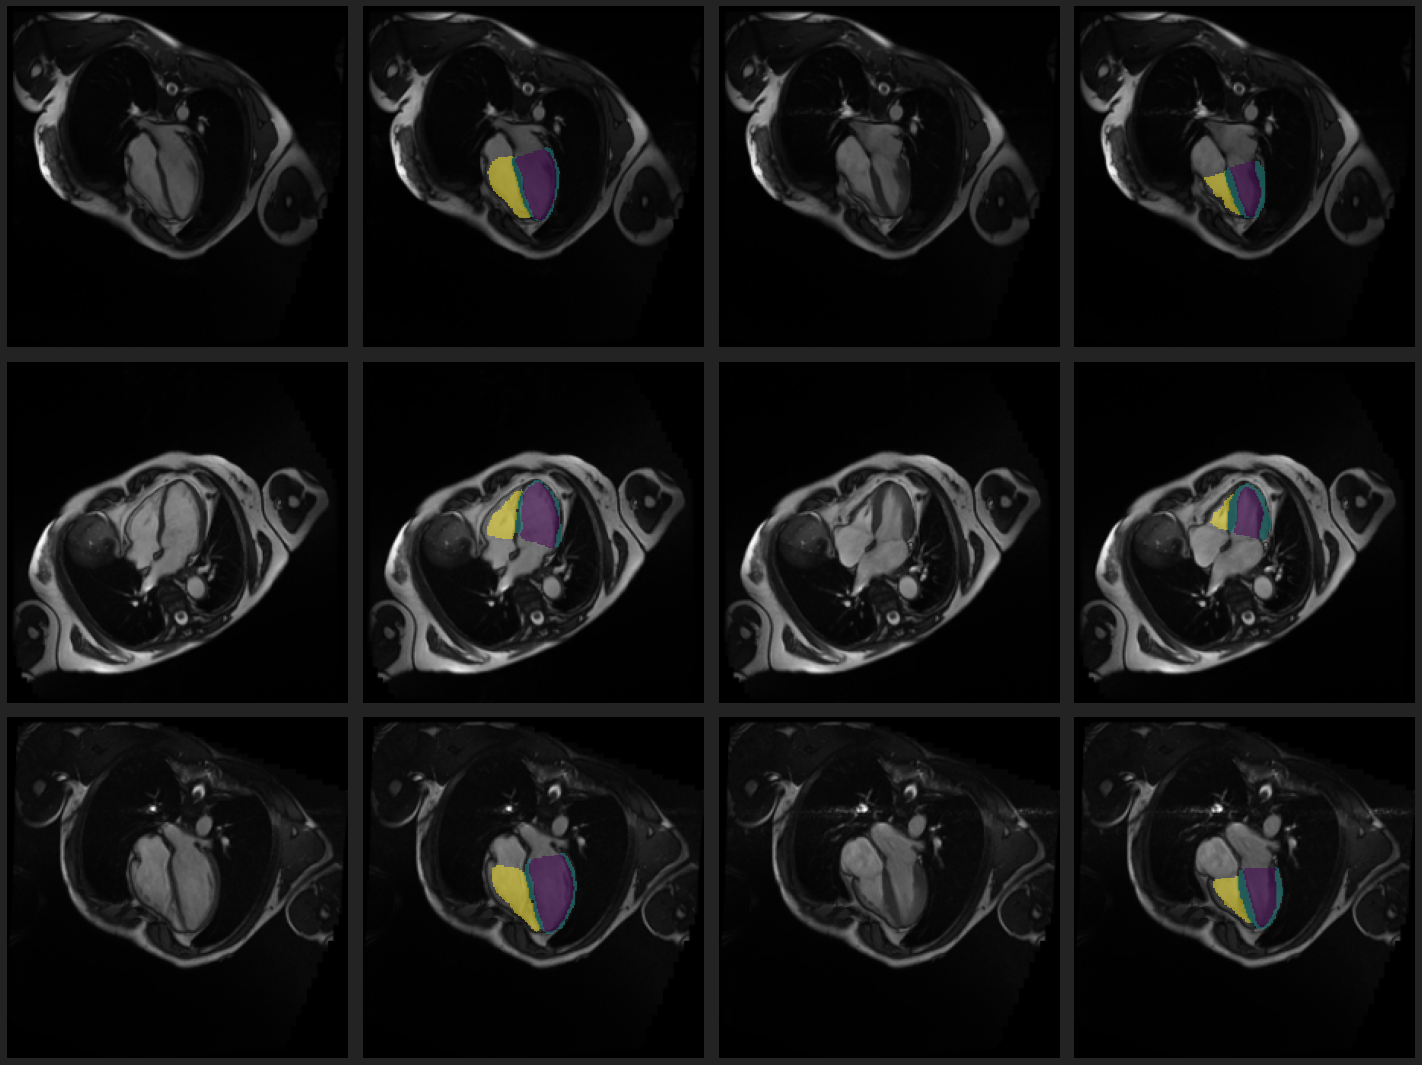

In [31]:
import matplotlib.pyplot as plt
import random
import torch

imgs, masks = next(iter(dm.train_dataloader()))
fig = plt.figure(figsize=(20, 5*len(imgs)))
for i in range(len(imgs)):
    ax = plt.subplot(len(imgs), 4, i*4 + 1)
    img = imgs[i]
    ax.imshow(img[0],cmap='gray')
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 2)
    mask = torch.argmax(masks[i][:4,...], axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[0], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 3)
    ax.imshow(img[1],cmap='gray')
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 4)
    mask = torch.argmax(masks[i][4:,...], axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[1], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from src.models import SMP

model = SMP({
    'model': 'Unet', 
    'backbone': 'resnet18', 
    'pretrained': 'imagenet', 
    'optimizer': 'Adam',
    'lr': 0.001
})

output = model(imgs)
output.shape

torch.Size([3, 8, 224, 224])

In [6]:
import pytorch_lightning as pl

trainer = pl.Trainer(
    gpus=1,
    precision=16,
    max_epochs=100,
    limit_train_batches=1,
    limit_val_batches=1
)

trainer.fit(model, dm)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | Unet | 14.3 M
-------------------------------
14.3 M    Trainable params
0         Non-trainable params
14.3 M    Total params
57.304    Total estimated model params size (MB)
/home/sensio/miniconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Validation sanity check: 0it [00:00, ?it/s]

/home/sensio/miniconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [11]:
model.eval()
with torch.no_grad():
    output = model(imgs)
    output = torch.sigmoid(output)
    
output.shape

torch.Size([3, 8, 224, 224])

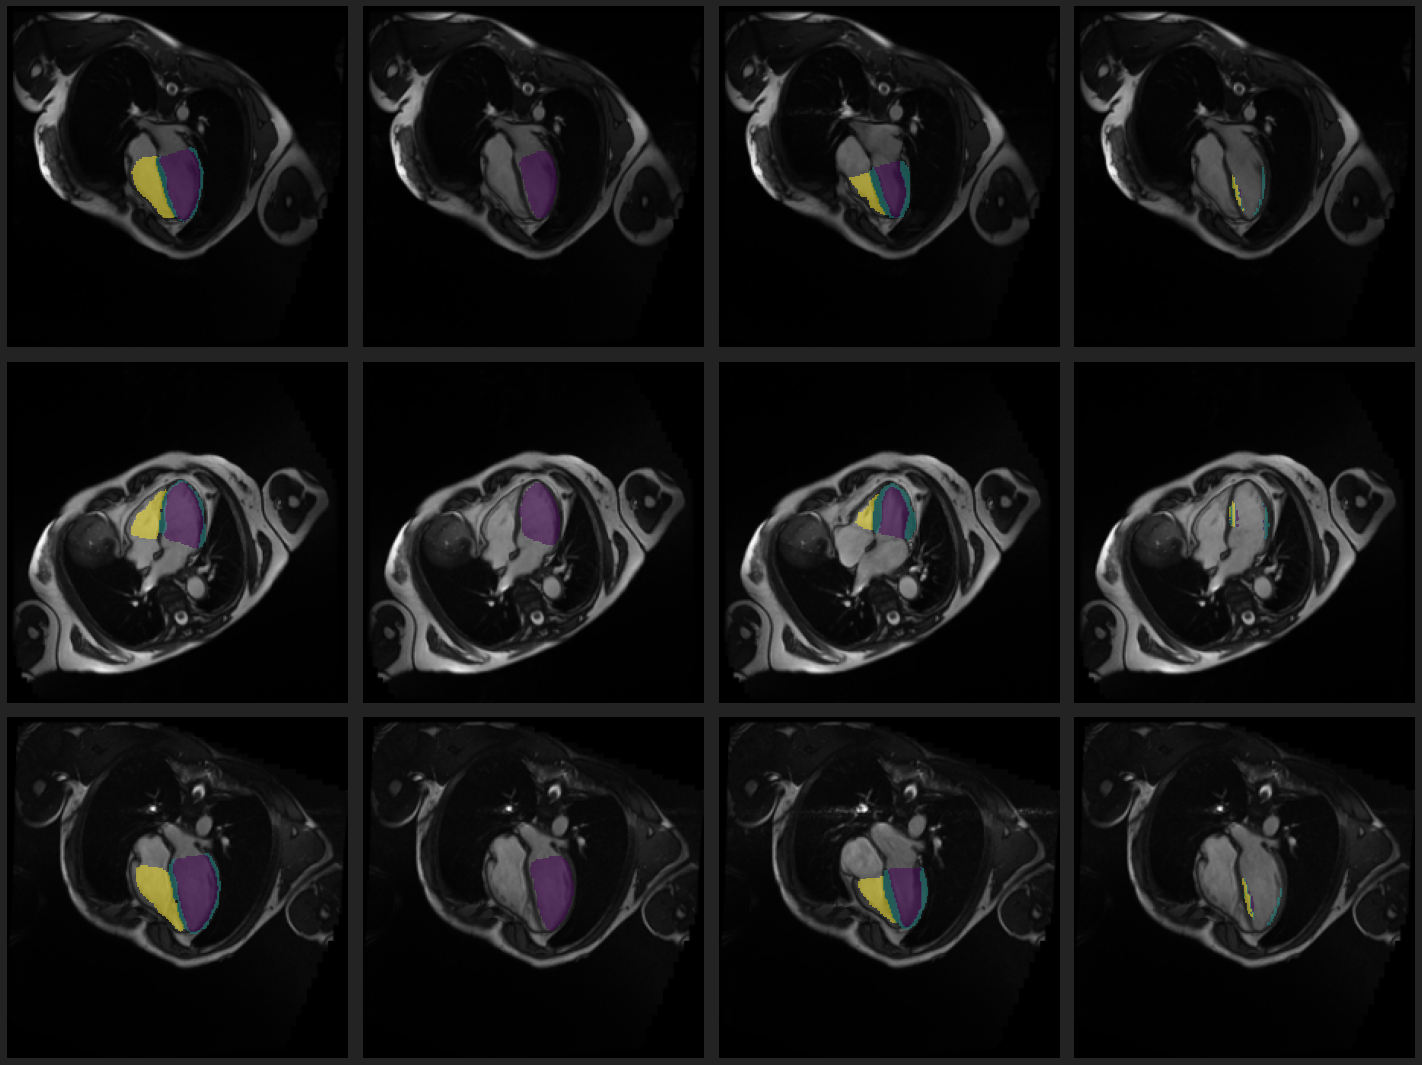

In [12]:
fig = plt.figure(figsize=(20, 5*len(imgs)))
for i in range(len(imgs)):
    ax = plt.subplot(len(imgs), 4, i*4 + 1)
    img = imgs[i]
    mask = torch.argmax(masks[i][:4,...], axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[0], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 2)
    pred = torch.argmax(output[i,:4,...], axis=0).float().numpy()
    pred[pred == 0] = np.nan
    ax.imshow(img[0], cmap="gray")
    ax.imshow(pred, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 3)
    mask = torch.argmax(masks[i][4:,...], axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[1], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 4)
    pred = torch.argmax(output[i,4:,...], axis=0).float().numpy()
    pred[pred == 0] = np.nan
    ax.imshow(img[0], cmap="gray")
    ax.imshow(pred, alpha=0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
for mask, pred in zip(masks, output):
    print(model.iou(mask[:4,...], pred[:4,...] > 0.5), model.iou(mask[4:,...], pred[4:, ...] > 0.5))

tensor(0.4734) tensor(0.2481)
tensor(0.4583) tensor(0.2487)
tensor(0.4794) tensor(0.2478)


In [14]:
model.iou(masks[:,:4,...], output[:,:4,...] > 0.5), model.iou(masks[:,4:,...], output[:,4:, ...] > 0.5)

(tensor(0.4704), tensor(0.2482))